# Dissertation

# Title

<h3>Predicting the impact of post-COVID on distance working     IT employees through a Neural Network</h3>

<b>Student Details</b>

<b>Name:</b> VYSHNAVI MUTHUMULA

<b>ID:</b> 20219772

<b>Course:</b> MSc Data Science

## Problem Statement


The aim of this research is to develop an advanced machine learning model that will assist in determining employee satisfaction as well as organizational scope changes as a result of remote working. The author also tries to investigate work-life balance, perspectives of employees based on their age, designation, resource details and cyber issues. So doing research on impact of COVID on software companies for finding employee satisfaction is more important to maintain employee work-life balance and growth of the company.

## Motivation of the Study

This research helps to build machine learning model for predicting the impact of post- COVID on distance working IT employees through a NN integrated sentiment analysis  and based on that organizations can predict the consequences and emotions when employees working remotely. Based on that results organizations can predict the future requirements if another pandemic occur. 

The objectives of the research is given below

1.	Business agendas and scope changes in organizations after the pandemic.

2.	Analyzing the impact of distance working (Remote working) in IT organizations.

3.	Organizing the personnel into categories based on their job titles and noting which departments support working from home and which do not

4.	Exploring the Age based employee work-life balance through visualizations.


## Analytical Question

What are the most important features of post-COVID distance working IT employees and how employee feel about work from home?

## Methods

The methods to conclude on answering the question will derive from analysis on the EDA and then the conduction towards accuracy analysis for my 4 chosen machine learning models with neural network as to conclude the most suitable algorithm to choose for the further analysis towards proving the most problematic and correlated factor linked to employee satisfaction. 

Once the most efficient model has been discovered then analysis towards concluding the most correlated feature will include the conduction of feature importance calculations and analysis the accuracy of each feature individually with the output.

## Dataset


This data set is taken from data.mendeley and please find the link below.

https://data.mendeley.com/datasets/59tp8sdgr8/2/files/f86e9212-f76c-48aa-a422-bd3d8d6976c0

# Getting Started

### Step 1 : Importing Libraries

As per the required operations user should need to download the libraries.

Pandas: This library is used to manipulate the data and it is built from Numby library.

Numpy: This library is used to perform mathematical operations on arrays.

Matplotlib: The name itself saying that it is used for ploting the graphs.

stats: This is used to perform statistics on the dataset.

seaborn: It is used to draw the statistic plots python.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
from matplotlib import style
from numpy import mean
from numpy import std

In [2]:
# Importing all machine learning machine models 
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification

# Evaluate multinomial logistic regression model

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.inspection import permutation_importance

# KNN libraries


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



#For detecting precision,confusion matrix and recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Neural network libraries
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import keras
from keras.callbacks import EarlyStopping


## Step 2 : Reading the data set and allocating it to the variable

Whenever google colab is used the following two lines code should be uncommented.

In [3]:
# Mounting Google drive to Google Colab

#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# Moving to that particular directory

#%cd "/content/drive/My Drive/Colab"

In [5]:

# input excel file path
inputExcelFile ="Book1.xlsx"

# Reading an excel file
excelFile = pd.read_excel (inputExcelFile)

# Converting excel file into CSV file
excelFile.to_csv ("WFH_COVID.csv", index = None, header=True)

# Reading and Converting the output csv file into a dataframe object
WFH_COVID_crisis_df = pd.DataFrame(pd.read_csv("WFH_COVID.csv"))


## Step 3 : Dataset description

In [6]:

# # Printing first 5 rows by using head funtion
WFH_COVID_crisis_df.head()

,ID,Start time,Completion time,Earlierwfh,Isguidelines,Guidelinesgiven,Devices,Useofdevicesbyothers,Assets,Devicesmanaged,...,Satisfaction,"I have all the support i need to face any technical problems i have (eg. corporate access issues, infrastructure failures, etc.).",I am proud to work for my organization.,I have access to the things I need to do my job well.,Age,Qualification,Role,Businessdomain,Designation,Comments
0,5,2020-07-04 16:53:59,2020-07-04 16:56:10,Yes,No,No,Laptop;,No,Corporate assets,"Yes, partly",...,Agree,Agree,Agree,Agree,25-34 years old,Master’s degree,Education & Research,No,Researcher,No
1,6,2020-07-04 17:37:30,2020-07-04 17:41:50,Yes,No,No,Laptop;,No,Corporate assets,No,...,Agree,Undecided,Agree,Agree,35-44 years old,Doctorate degree,Education & Research,No,Researcher,-
2,7,2020-08-04 14:16:24,2020-08-04 14:19:31,Yes,No,No,Laptop;Smartphone;,No,Personal assets,No,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,45-54 years old,Doctorate degree,Security (cyber),No,Manager,No
3,8,2020-08-04 14:17:51,2020-08-04 14:19:55,Yes,Yes,No,Laptop;,No,Corporate assets,No,...,Agree,Agree,Undecided,Strongly agree,25-34 years old,Doctorate degree,Education & Research,No,Researcher,No
4,9,2020-08-04 14:16:45,2020-08-04 14:20:02,Yes,Yes,Use of VPN,Laptop;Smartphone;,No,Corporate assets,No,...,Strongly agree,Strongly agree,Agree,Strongly agree,35-44 years old,Doctorate degree,Education & Research,No,IT professional,No


In [7]:
# For getting concise summary of the dataset 
WFH_COVID_crisis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 32 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                              --------------  ----- 
 0   ID                                                                                                                                  264 non-null    int64 
 1   Start time                                                                                                                          264 non-null    object
 2   Completion time                                                                                                                     264 non-null    object
 3   Earlierwfh                                                                                

All the basic information showed using info function.

In [8]:
# Printing columns
WFH_COVID_crisis_df.columns

Index(['ID', 'Start time', 'Completion time', 'Earlierwfh', 'Isguidelines',
       'Guidelinesgiven', 'Devices', 'Useofdevicesbyothers', 'Assets',
       'Devicesmanaged', 'Devicespec', 'Thirdpartyenv',
       'Please describe how you obtain access to your corporate working environment.',
       'Were you asked to use applications or services that you were unfamiliar with, because of the need for remote working?',
       'Awareness',
       'Has your company adopted a specific collaboration solution?', 'Skills',
       'Issues', 'Othercyberissues', 'Preference', 'WFHResults',
       'I collaborate with my colleagues as effectively as when we are in office.',
       'Satisfaction',
       'I have all the support i need to face any technical problems i have (eg. corporate access issues,  infrastructure failures, etc.).',
       'I am proud to work for my organization.',
       'I have access to the things I need to do my job well.', 'Age',
       'Qualification', 'Role', 'Businessdomain'

All the columns are displayed using column function

In [9]:
# Checking data types
WFH_COVID_crisis_df.dtypes

ID                                                                                                                                     int64
Start time                                                                                                                            object
Completion time                                                                                                                       object
Earlierwfh                                                                                                                            object
Isguidelines                                                                                                                          object
Guidelinesgiven                                                                                                                       object
Devices                                                                                                                               object
Useofdevicesb

As per the results all the columns data types are either int or object.

In [10]:
# Finding shape of the file
WFH_COVID_crisis_df.shape

(264, 32)

In this dataset total we got 264 responses from employees with 32 different questions.
Total rows are 264 and total columns are 32.

In [11]:
# Checking how many employees given response for each field present in the data.
WFH_COVID_crisis_df['Satisfaction'].value_counts()

Agree                108
Strongly agree       107
Undecided             25
Disagree              16
Strongly disagree      8
Name: Satisfaction, dtype: int64

**Checking for null values**

In [12]:
# Checking null values in ascending order
WFH_COVID_crisis_df.isna().sum().sort_values(ascending=False)

Guidelinesgiven                                                                                                                       8
Othercyberissues                                                                                                                      2
Comments                                                                                                                              1
Issues                                                                                                                                0
Designation                                                                                                                           0
Businessdomain                                                                                                                        0
Role                                                                                                                                  0
Qualification                                   

The output is saying that there are less null values present for this data set that means the data is partially cleaned.

<Axes: >

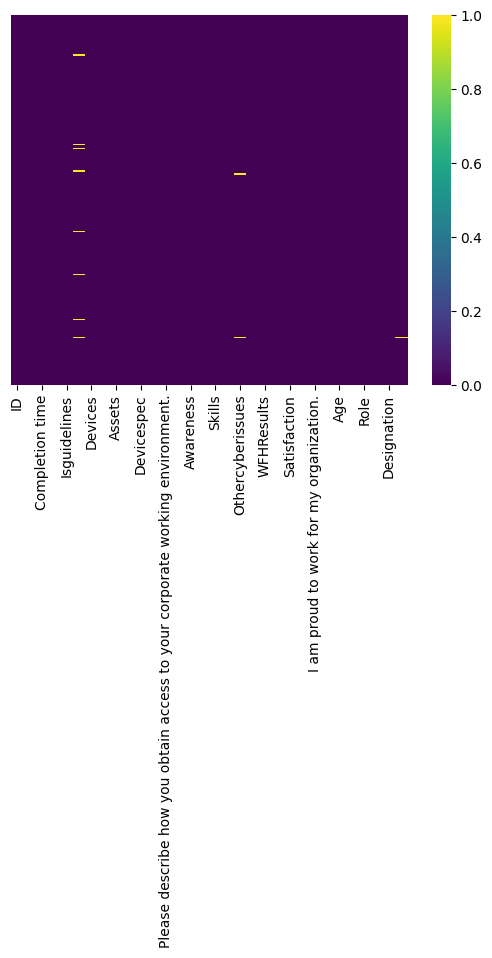

In [13]:
# Visualizing the null values through heat map
sns.heatmap(WFH_COVID_crisis_df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

## **Step 4 : Data Cleaning**

The current data set has some null values and duplicates. So we need to do cleaning.

In [14]:
# Check for null values
WFH_COVID_crisis_df.isna().sum()

ID                                                                                                                                    0
Start time                                                                                                                            0
Completion time                                                                                                                       0
Earlierwfh                                                                                                                            0
Isguidelines                                                                                                                          0
Guidelinesgiven                                                                                                                       8
Devices                                                                                                                               0
Useofdevicesbyothers                            

From the above results we can say that there are some values present in the dataset but not so many. And those null values can negligible or dropped from the dataset because the main variables which effecting the employee satisfaction field has no null values.

<Axes: >

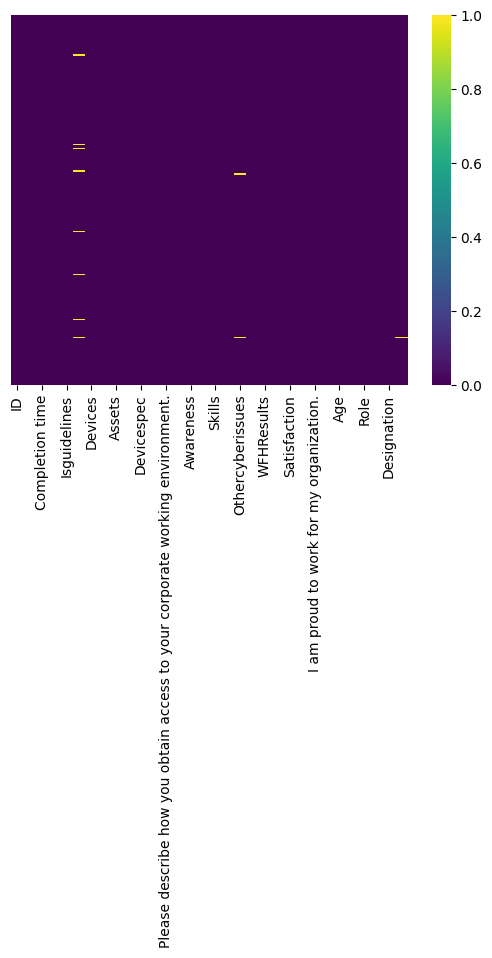

In [15]:
# Visualizing the null values for better view
sns.heatmap(WFH_COVID_crisis_df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

The yellow lines indicates the number of null values. Column 'Isguidelines' has 8 null values, 
'Othercyberissues' has 2 and 'Comments' has 1 null value.

**Handling Missing / null / irregular information**

If there are null values from the set then for removing those we are using dropna function which deletes entire row which has Nan values.

In [16]:
# Dropping the Nan values
WFH_COVID_crisis_df.dropna(inplace=True)

In [17]:
# Checking the shape
WFH_COVID_crisis_df.shape

(255, 32)

After removing null values then check for Nan values again.

<Axes: >

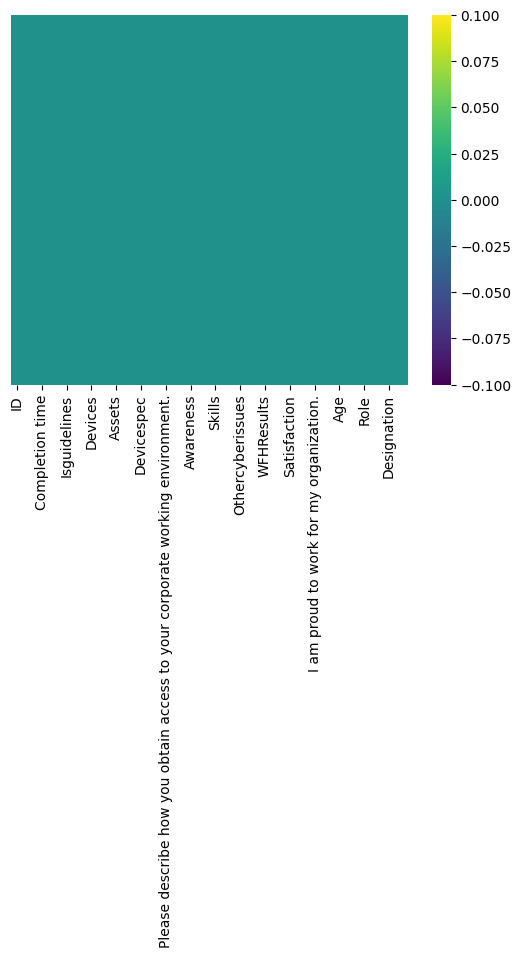

In [18]:
# Visualizing the null values for better view
sns.heatmap(WFH_COVID_crisis_df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

No null values.

**Deleting unwanted columns**

In [19]:
# for deleting specific column and by adding inplace=True will reflict the change to main dataset
# Dropping ID column using drop function
WFH_COVID_crisis_df.drop('ID',axis=1,inplace=True)


In [20]:
# Dropping Start time and Completion time columns using drop function
WFH_COVID_crisis_df.drop('Start time', axis = 1, inplace = True)
WFH_COVID_crisis_df.drop('Completion time',axis = 1,inplace = True)


This will delete entire column from the dataset

In [21]:
# Printing first 5 rows
WFH_COVID_crisis_df.head()

,Earlierwfh,Isguidelines,Guidelinesgiven,Devices,Useofdevicesbyothers,Assets,Devicesmanaged,Devicespec,Thirdpartyenv,Please describe how you obtain access to your corporate working environment.,...,Satisfaction,"I have all the support i need to face any technical problems i have (eg. corporate access issues, infrastructure failures, etc.).",I am proud to work for my organization.,I have access to the things I need to do my job well.,Age,Qualification,Role,Businessdomain,Designation,Comments
0,Yes,No,No,Laptop;,No,Corporate assets,"Yes, partly",Password protection;Antivirus software install...,Remote connection to your workstation (e.g. Te...,No,...,Agree,Agree,Agree,Agree,25-34 years old,Master’s degree,Education & Research,No,Researcher,No
1,Yes,No,No,Laptop;,No,Corporate assets,No,Password protection;Antivirus software installed;,No special provisions,No,...,Agree,Undecided,Agree,Agree,35-44 years old,Doctorate degree,Education & Research,No,Researcher,-
2,Yes,No,No,Laptop;Smartphone;,No,Personal assets,No,Password protection;Antivirus software installed;,No special provisions,No,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,45-54 years old,Doctorate degree,Security (cyber),No,Manager,No
3,Yes,Yes,No,Laptop;,No,Corporate assets,No,Password protection;Automatic screen lock;Anti...,No special provisions,No,...,Agree,Agree,Undecided,Strongly agree,25-34 years old,Doctorate degree,Education & Research,No,Researcher,No
4,Yes,Yes,Use of VPN,Laptop;Smartphone;,No,Corporate assets,No,Password protection;Antivirus software installed;,VPN access,No,...,Strongly agree,Strongly agree,Agree,Strongly agree,35-44 years old,Doctorate degree,Education & Research,No,IT professional,No


In [22]:
# Replcing Yes with 1, No with 0 for Earlierwfh column field
WFH_COVID_crisis_df['Earlierwfh'] = WFH_COVID_crisis_df['Earlierwfh'].replace("Yes", 1)
WFH_COVID_crisis_df['Earlierwfh'] = WFH_COVID_crisis_df['Earlierwfh'].replace("No", 0)

In [23]:
# Replcing Yes with 1, No with 0 for Isguidelines column field
WFH_COVID_crisis_df['Isguidelines'] = WFH_COVID_crisis_df['Isguidelines'].replace("Yes", 1)
WFH_COVID_crisis_df['Isguidelines'] = WFH_COVID_crisis_df['Isguidelines'].replace("No", 0)

In [24]:
# Replcing Yes with 1, No with 0 for Useofdevicesbyothers column field
WFH_COVID_crisis_df['Useofdevicesbyothers'] = WFH_COVID_crisis_df['Useofdevicesbyothers'].replace("Yes", 1)
WFH_COVID_crisis_df['Useofdevicesbyothers'] = WFH_COVID_crisis_df['Useofdevicesbyothers'].replace("No", 0)

In [25]:
# Renaming the column name using rename inbuild function
WFH_COVID_crisis_df=WFH_COVID_crisis_df.rename(columns = 
                                               {
                                                'Were you asked to use applications or services that you were unfamiliar with, because of the need for remote working?'
                                                :'Permissionsasked'
                                               }
                                              )



In [26]:
# Renaming the column name using rename inbuild function
WFH_COVID_crisis_df=WFH_COVID_crisis_df.rename(columns = 
                                               {
                                                'Has your company adopted a specific collaboration solution?'
                                                :'IsnewtechPrest'
                                               }
                                              )




In [27]:
# Replcing Yes with 1, No with 0 for Permissionsasked column field
WFH_COVID_crisis_df['Permissionsasked'] = WFH_COVID_crisis_df['Permissionsasked'].replace("Yes", 1)
WFH_COVID_crisis_df['Permissionsasked'] = WFH_COVID_crisis_df['Permissionsasked'].replace("No", 0)

In [28]:
# Replcing Yes with 1, No with 0 for IsnewtechPrest column field
WFH_COVID_crisis_df['IsnewtechPrest'] = WFH_COVID_crisis_df['IsnewtechPrest'].replace("Yes", 1)
WFH_COVID_crisis_df['IsnewtechPrest'] = WFH_COVID_crisis_df['IsnewtechPrest'].replace("No", 0)

In [29]:
# Finding descritive analysis for the data frame.
WFH_COVID_crisis_df.describe()

,Earlierwfh,Isguidelines,Useofdevicesbyothers,Permissionsasked,IsnewtechPrest
count,255.000000,255.000000,255.000000,255.000000,255.000000
mean,0.756863,0.447059,0.149020,0.176471,0.654902
std,0.429821,0.498167,0.356808,0.381970,0.476335
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


The describe function is used to find the statistical values for the entire data set columns such as mean, count, standard deviation, minimum value, lower quartile, median, upper quartile and maximum value.

In [30]:
# Correlation for all the columns by using corr funtion which is an inbuild funtion
WFH_COVID_crisis_df.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_7796\392628457.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  WFH_COVID_crisis_df.corr()


,Earlierwfh,Isguidelines,Useofdevicesbyothers,Permissionsasked,IsnewtechPrest
Earlierwfh,1.000000,-0.115512,-0.122214,-0.073351,0.069301
Isguidelines,-0.115512,1.000000,0.177454,0.101016,0.154982
Useofdevicesbyothers,-0.122214,0.177454,1.000000,0.152931,0.025799
Permissionsasked,-0.073351,0.101016,0.152931,1.000000,0.076371
IsnewtechPrest,0.069301,0.154982,0.025799,0.076371,1.000000


The correlation function is used to find the relation between the variables.

## Step 4 : Visualizations

Visualizations are the pictorical representation of the data which can be easily understand by end user without any difficulties.

<Axes: ylabel='Age'>

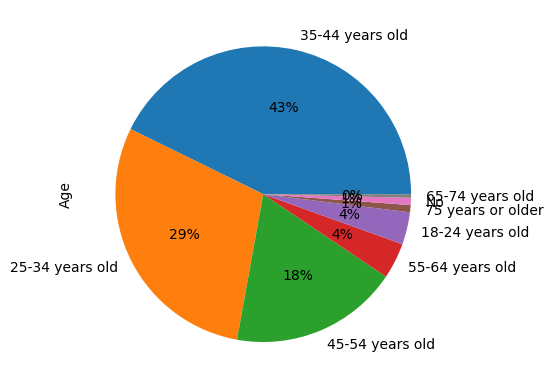

In [31]:
# Checking age groups are present.
WFH_COVID_crisis_df['Age'].value_counts().plot.pie(autopct='%1.0f%%',explode=None)

From the above pie chart we can say that there is one irregular column value present in the dataset. For better performance we should remove that. The removing steps are given below.

In [32]:
# Finding the wrong age values
WFH_COVID_crisis_df.loc[WFH_COVID_crisis_df['Age']=='No']

,Earlierwfh,Isguidelines,Guidelinesgiven,Devices,Useofdevicesbyothers,Assets,Devicesmanaged,Devicespec,Thirdpartyenv,Please describe how you obtain access to your corporate working environment.,...,Satisfaction,"I have all the support i need to face any technical problems i have (eg. corporate access issues, infrastructure failures, etc.).",I am proud to work for my organization.,I have access to the things I need to do my job well.,Age,Qualification,Role,Businessdomain,Designation,Comments
81,1,0,No,Desktop;Laptop;,1,Personal assets,No,Password protection;,Using VPN,No,...,Agree,Agree,Agree,Agree,No,No,IT (Information Technology),No,IT professional,No
174,1,1,No,Desktop;Laptop;Tablet;Smartphone;,1,Corporate assets,"Yes, fully",Password protection;Automatic screen lock;Anti...,Using VPN,No,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,No,No,EPES (Electrical Power & Energy Systems),No,Other,No


From the above results it found out that there are 2 irregular age values.

In [33]:
# Dropping the wrong age group values by finding the location where Age equals to 'No'
WFH_COVID_crisis_df.drop(WFH_COVID_crisis_df.loc[WFH_COVID_crisis_df['Age']=='No'].index, inplace=True)

In [34]:
# Checking the values
WFH_COVID_crisis_df.loc[WFH_COVID_crisis_df['Age']=='No']

,Earlierwfh,Isguidelines,Guidelinesgiven,Devices,Useofdevicesbyothers,Assets,Devicesmanaged,Devicespec,Thirdpartyenv,Please describe how you obtain access to your corporate working environment.,...,Satisfaction,"I have all the support i need to face any technical problems i have (eg. corporate access issues, infrastructure failures, etc.).",I am proud to work for my organization.,I have access to the things I need to do my job well.,Age,Qualification,Role,Businessdomain,Designation,Comments


Now age group values are perfect for furthur processes.

<Axes: ylabel='Age'>

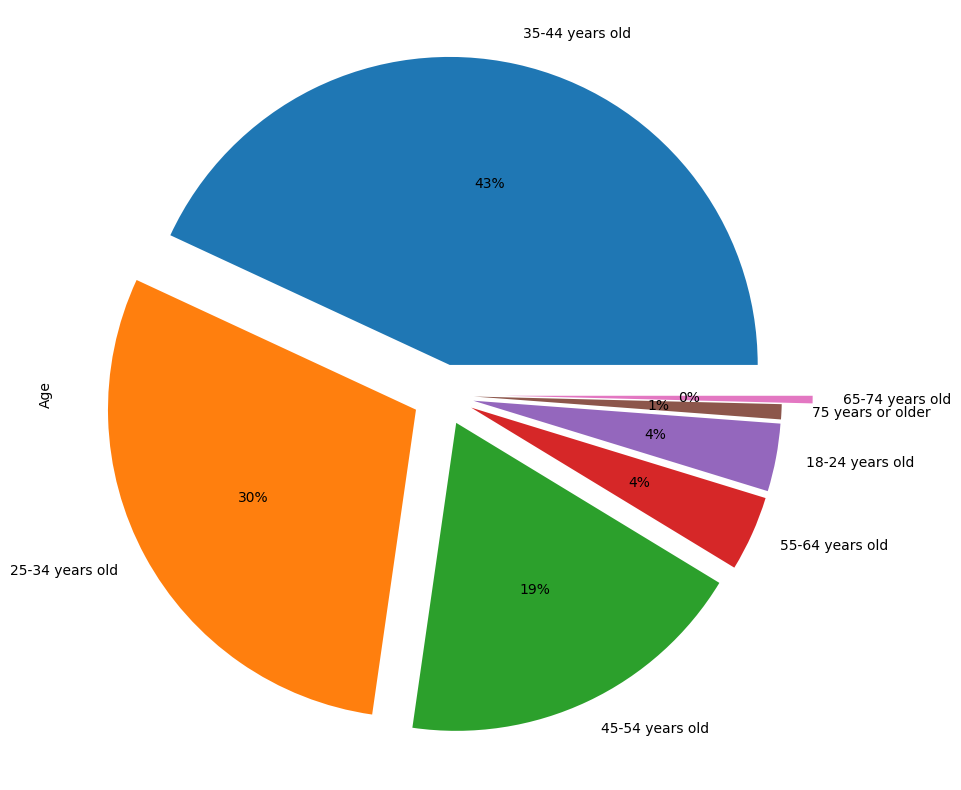

In [35]:
# Checking age groups are present.
fig = plt.figure(figsize=(10,10))

data = WFH_COVID_crisis_df['Age'].value_counts()
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.2)
data.plot(kind='pie',autopct='%0.f%%', explode = explode)

Age 35-44 age group people filled the survey more (43%).
Age 25-34 age group people are second highest people who given answers to the survey (30%).
Age 45-54 age group people are 19%.
4% people from both 55-64 and 18-24 age group.
Above 75% are very less i.e. only 1% people filled.
No one from age 65-75 years old people given survey.

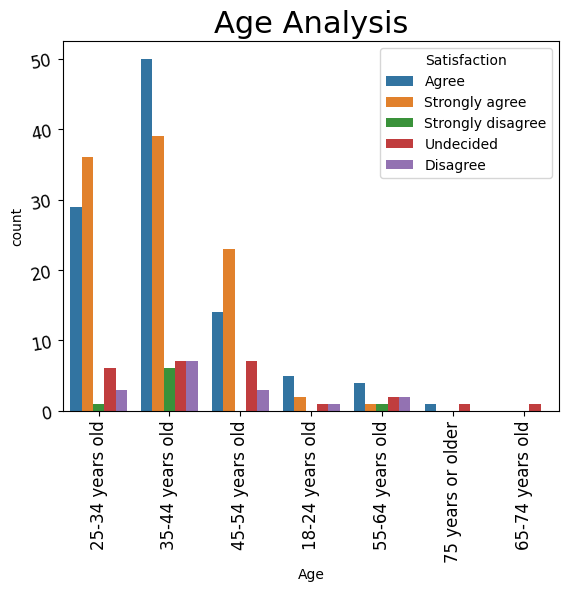

In [36]:
# Checking which age group people effected by work from home using count plot.
sns.countplot(x="Age", hue = 'Satisfaction', data=WFH_COVID_crisis_df)
# Decorations
plt.title('Age Analysis', fontsize=22)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12,rotation=10)
plt.show()

From the above results age 35-44 years people are preferring work from home than other age group people. All age people want remote work to be perminent than face to face work.

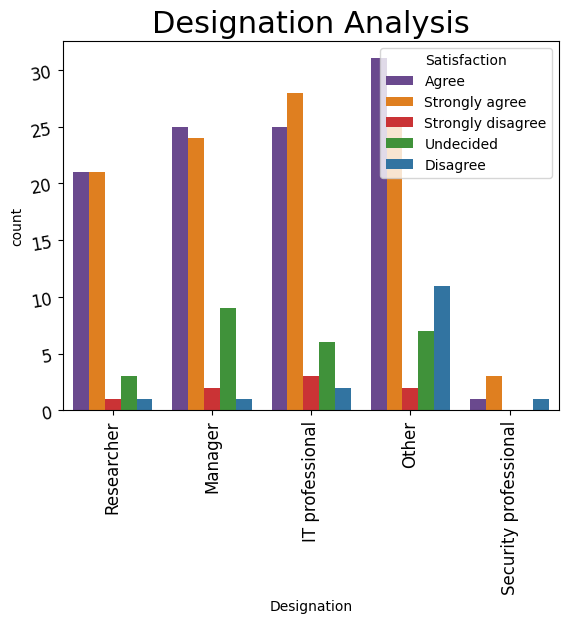

In [37]:
# Checking which designation people effected by remote work using count plot.
sns.countplot(x="Designation", hue = 'Satisfaction', data=WFH_COVID_crisis_df, palette = 'Paired_r')
# Decorations
plt.title('Designation Analysis', fontsize=22)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12,rotation=10)
plt.show()

Security professionals don't want work from home because if people are working remotely chances of getting cyber issues more and burden to security profssionals will be high.
IT professionals second highest people who want wfh than office work. Other employers like Testers, Business analyst people enjoying their remote work.

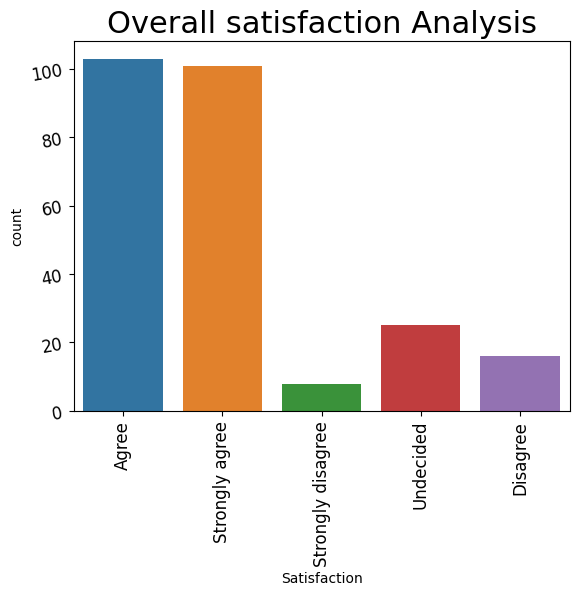

In [38]:
# Checking how people satisfied to the new technology using count plot.
sns.countplot(x='Satisfaction', data=WFH_COVID_crisis_df)
# Decorations
plt.title('Overall satisfaction Analysis', fontsize=22)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12,rotation=10)
plt.show()

Overall for Agree statement got 110 votes. Strongly agree got 100, Disagree 20, Strong disagree 10 and undecided 30. These are the votes given by employees about remote work.


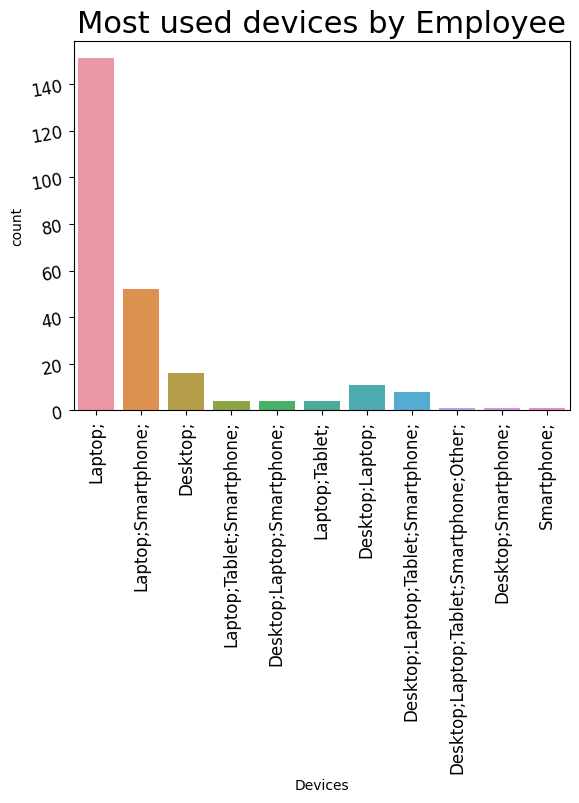

In [39]:
# Checking which devices used by employee during tele work using count plot.
sns.countplot(x='Devices', data=WFH_COVID_crisis_df)
# Decorations
plt.title('Most used devices by Employee', fontsize=22)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12,rotation=10)
plt.show()

When it come to work maintaiinng security is very important along with employee comfort. The study results mostly employees are preferring Laptop than other devices because latest laptops have very good security features and easy carry. 

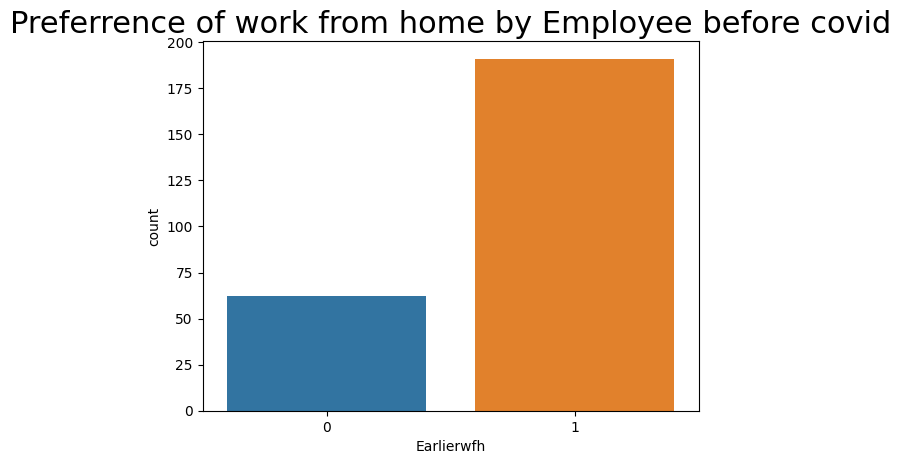

In [40]:
# Checking earlier decision about work from home using count plot.
sns.countplot(x='Earlierwfh', data=WFH_COVID_crisis_df)
# Decorations
plt.title('Preferrence of work from home by Employee before covid', fontsize=22)
plt.show()

Before this pandemic also IT employees are interested in remote work as this reduces travelling and employee can stay at home and enjoy with their family members.

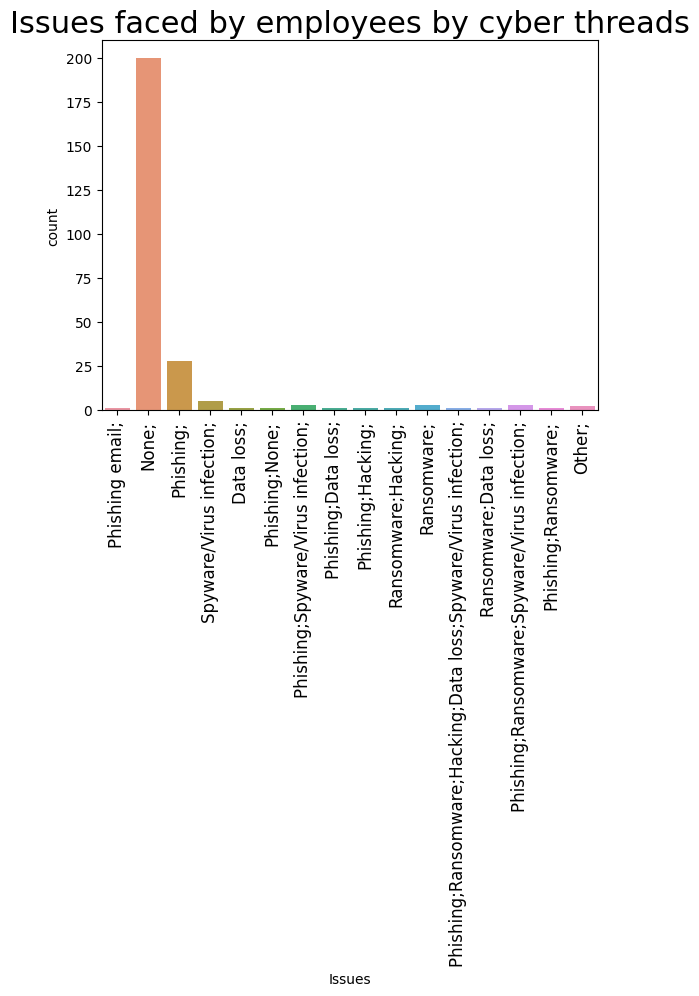

In [41]:
# Finding the issues faced by employees by cyber threads.
sns.countplot(x='Issues', data=WFH_COVID_crisis_df)
# Decorations
plt.title('Issues faced by employees by cyber threads', fontsize=22)
plt.xticks(fontsize=12,rotation=90)
plt.show()

This research result that cyber issues are less. Phishing is more because this attack is done through fraud emails. But many employees dont have any idea about cyber attacks as there domain of work is different. So because of that employee may notbe able to find whether the data breach happened or not. The employer must give training sessions to each employee so that all the employees can have the idea about it and they will maintain some security guidelines.

<Axes: ylabel='Thirdpartyenv'>

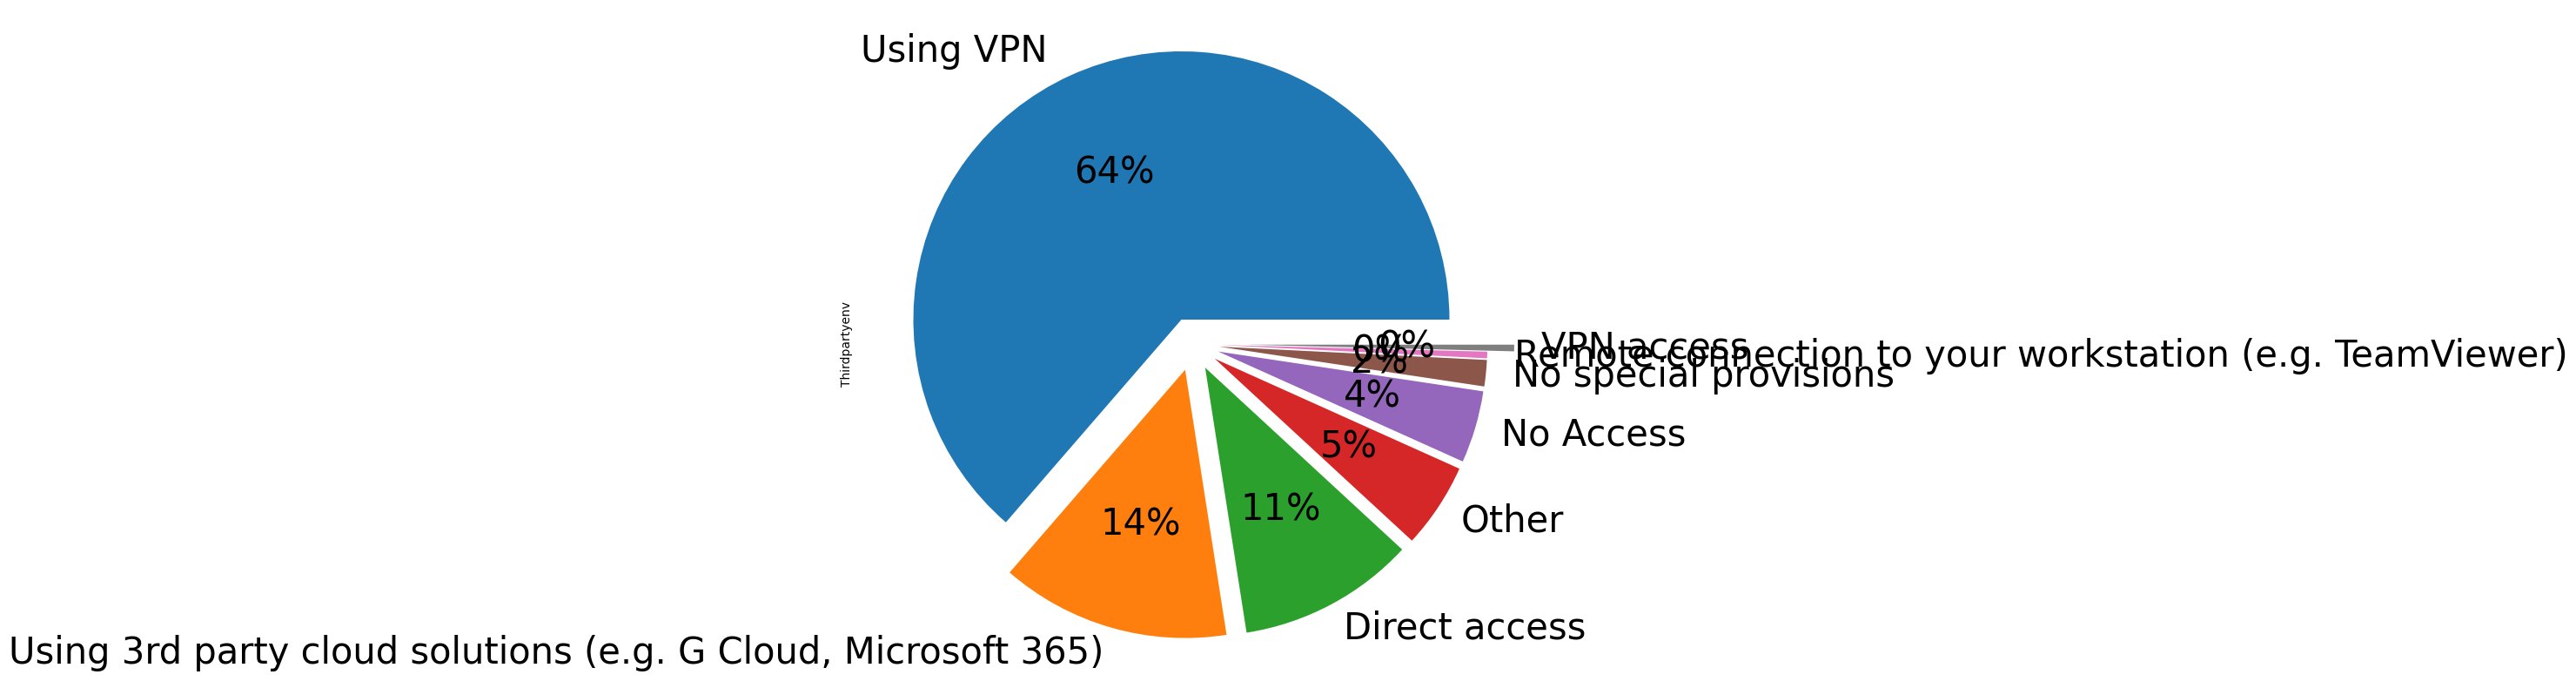

In [42]:
# Printing the what are the third party environments used by employee
fig = plt.figure(figsize=(10,10))

data = WFH_COVID_crisis_df['Thirdpartyenv'].value_counts()
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2)
data.plot(kind='pie',autopct='%0.f%%', explode = explode, textprops={'fontsize': 30})

Most of the client is providing VPN as the virtual network to reduce risks.

In [43]:
# Locating the unwanted column data
WFH_COVID_crisis_df.loc[WFH_COVID_crisis_df['Thirdpartyenv']=='VPN access']

,Earlierwfh,Isguidelines,Guidelinesgiven,Devices,Useofdevicesbyothers,Assets,Devicesmanaged,Devicespec,Thirdpartyenv,Please describe how you obtain access to your corporate working environment.,...,Satisfaction,"I have all the support i need to face any technical problems i have (eg. corporate access issues, infrastructure failures, etc.).",I am proud to work for my organization.,I have access to the things I need to do my job well.,Age,Qualification,Role,Businessdomain,Designation,Comments
4,1,1,Use of VPN,Laptop;Smartphone;,0,Corporate assets,No,Password protection;Antivirus software installed;,VPN access,No,...,Strongly agree,Strongly agree,Agree,Strongly agree,35-44 years old,Doctorate degree,Education & Research,No,IT professional,No


In [44]:
# Dropping the unwanted column data
WFH_COVID_crisis_df.drop(WFH_COVID_crisis_df.loc[WFH_COVID_crisis_df['Thirdpartyenv']=='VPN access'].index, inplace=True)

<Axes: ylabel='Thirdpartyenv'>

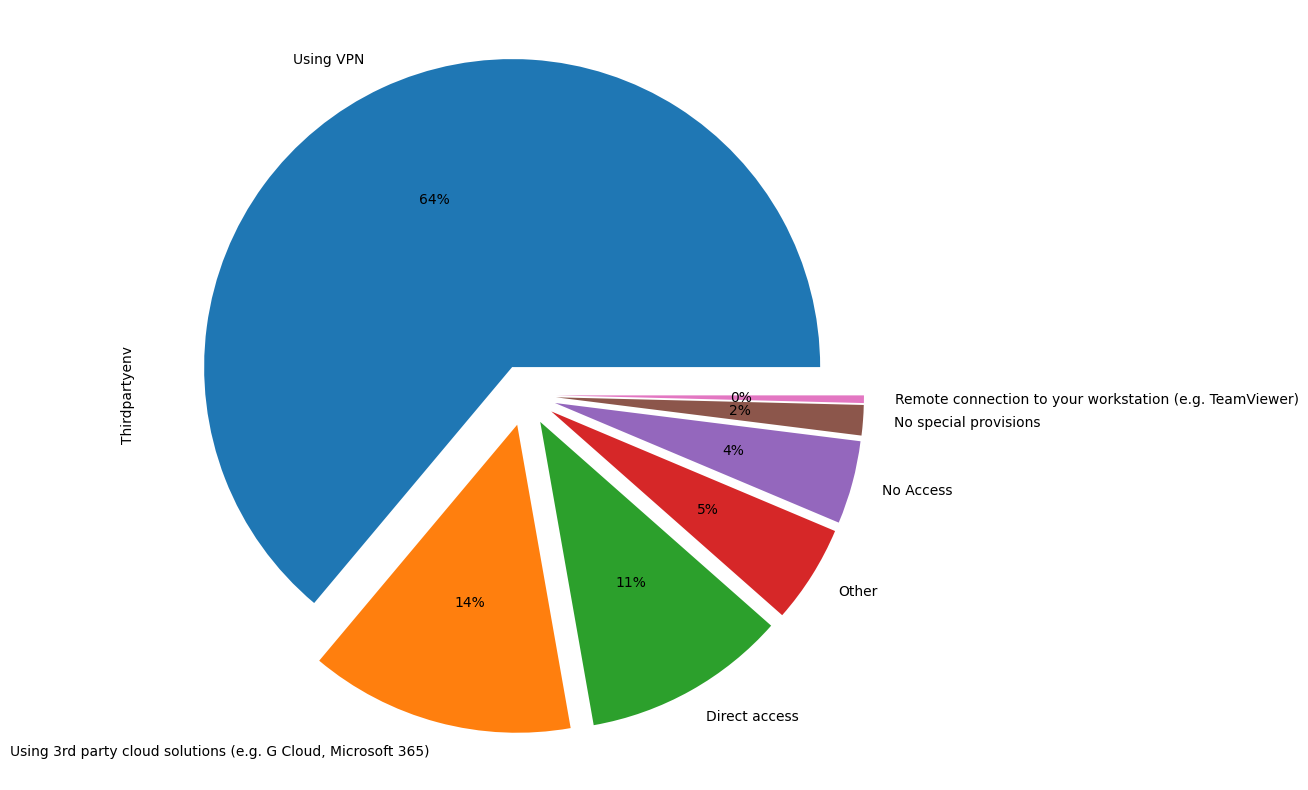

In [45]:
# Printing the what are the third party environments used by employee
fig = plt.figure(figsize=(10,10))

data = WFH_COVID_crisis_df['Thirdpartyenv'].value_counts()
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1)
data.plot(kind='pie',autopct='%0.f%%', explode = explode)

Most of the client is providing VPN as the virtual network to reduce risks. No one is using TeamViewer.

In [46]:
# Creating list for Thirdpatyenv column and keeping in a seperate variable
env= list(WFH_COVID_crisis_df['Thirdpartyenv'])
env = list(dict.fromkeys(env))
env

['Remote connection to your workstation (e.g. TeamViewer)',
 'No special provisions',
 'Direct access',
 'Using VPN ',
 'Using 3rd party cloud solutions (e.g. G Cloud, Microsoft 365)',
 'No Access',
 'Other']

In [47]:
# Creating list for the count of Thirdpatyenv column
time_speed = list(WFH_COVID_crisis_df['Thirdpartyenv'].value_counts())
time_speed

[161, 35, 27, 13, 11, 4, 1]

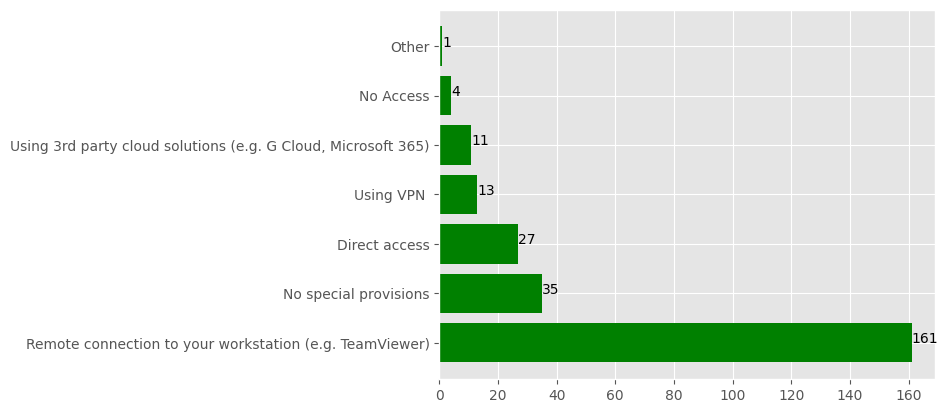

In [48]:
# Plotting the graph using ggplot style

style.use('ggplot')
plt.barh(env,time_speed, color = 'green')
for index, value in enumerate(time_speed):
    plt.text(value, index, str(value))
plt.show()

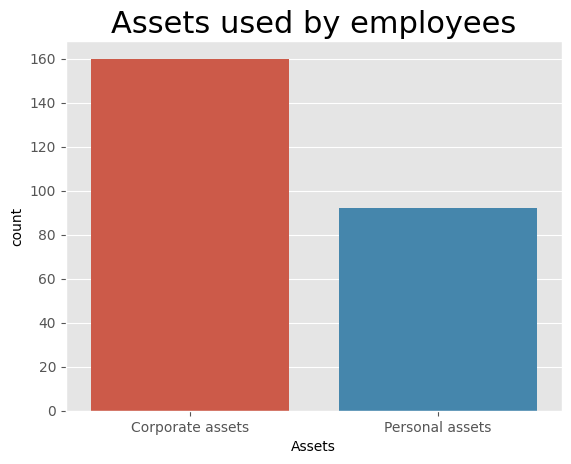

In [49]:
# Checking how many Assets used by employees using count plot.
sns.countplot(x='Assets', data=WFH_COVID_crisis_df)
# Decorations
plt.title('Assets used by employees', fontsize=22)

plt.show()

More than half employees are preferrening corporate assets over personal assets because office people will provide necessary software with more secure operating systems but in employee personal assets the employee must install all the required softwares for the project without IT support.

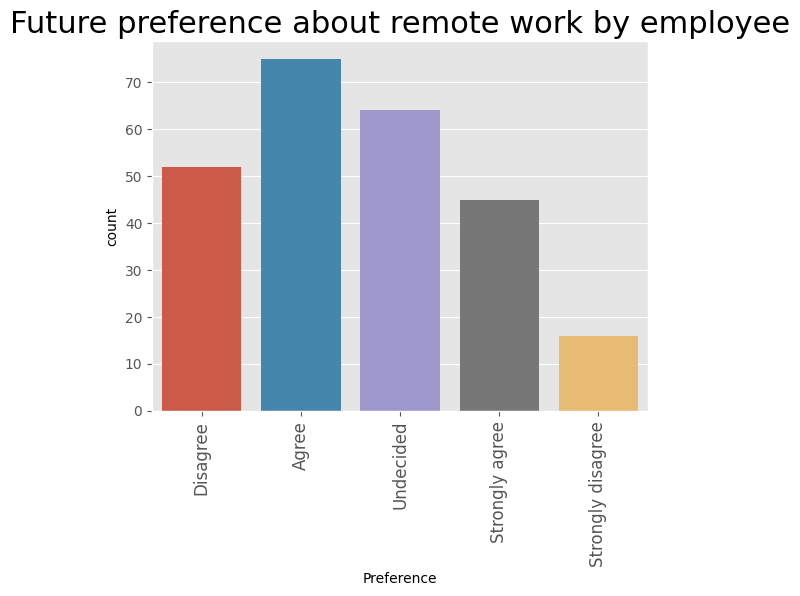

In [50]:
# Checking the future preference about remote work by employee using count plot.
sns.countplot(x = 'Preference', data = WFH_COVID_crisis_df)
# Decorations
plt.title('Future preference about remote work by employee', fontsize=22)
plt.xticks(fontsize=12,rotation=90)

plt.show()

Compared to negative reviews positive reviews are more for remote work by employees that's why some people requesting perminent work from but and 40% of the employees don't want work from home as they are not able to balance their mental health and work pressure. 50% people are not able to decide what to choose.

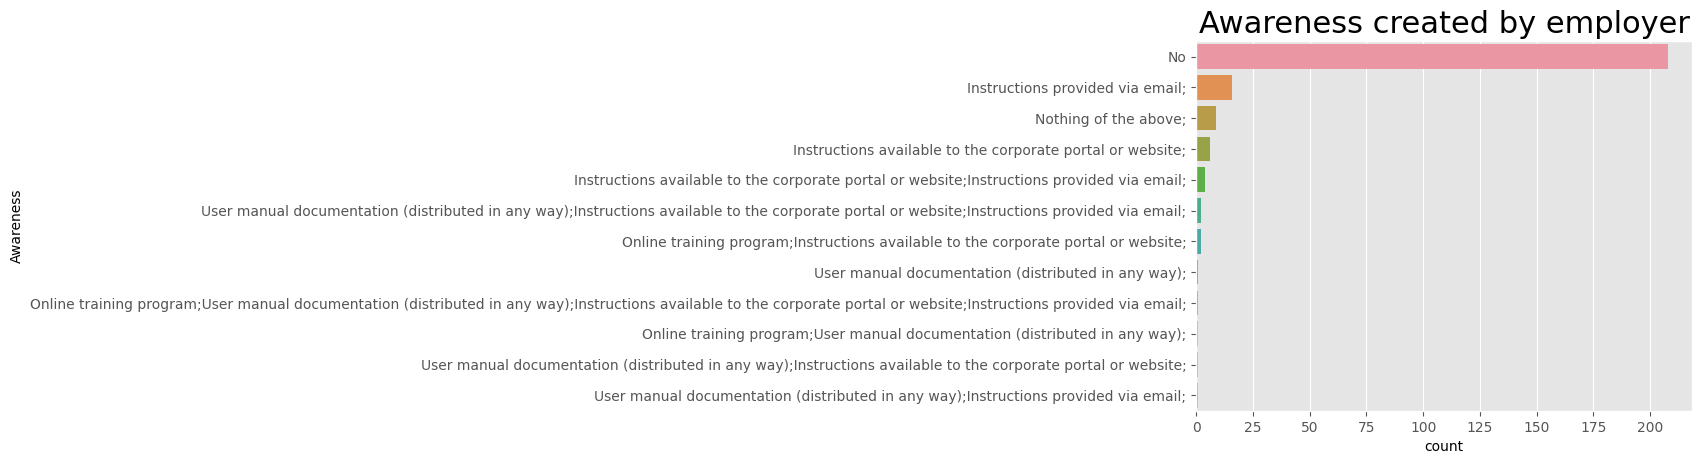

In [51]:

# Awareness created by employer
sns.countplot(y="Awareness", data=WFH_COVID_crisis_df)
# Decorations
plt.title('Awareness created by employer', fontsize=22)

plt.show()

Many employees are saying that they didnt get proper awareness of the work, cyber issues, how to use the asset properly and furture notifications. Most of the information they given through email, corporate portal or website, online trainings and user manual documentation.

In [52]:
# Checking and assigning stop words. Stop words are the words which will e useful for reader not machine. So remove stop words
content_stop_words = ['a','an','for','which','any','many','not','none','more','why','where','what','this','by',
                      'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 
                      'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do',
                      'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 
                      'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 
                      'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 
                      'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 
                      'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 
                      'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 
                      'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 
                      'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 
                      't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 
                      'here', 'than']

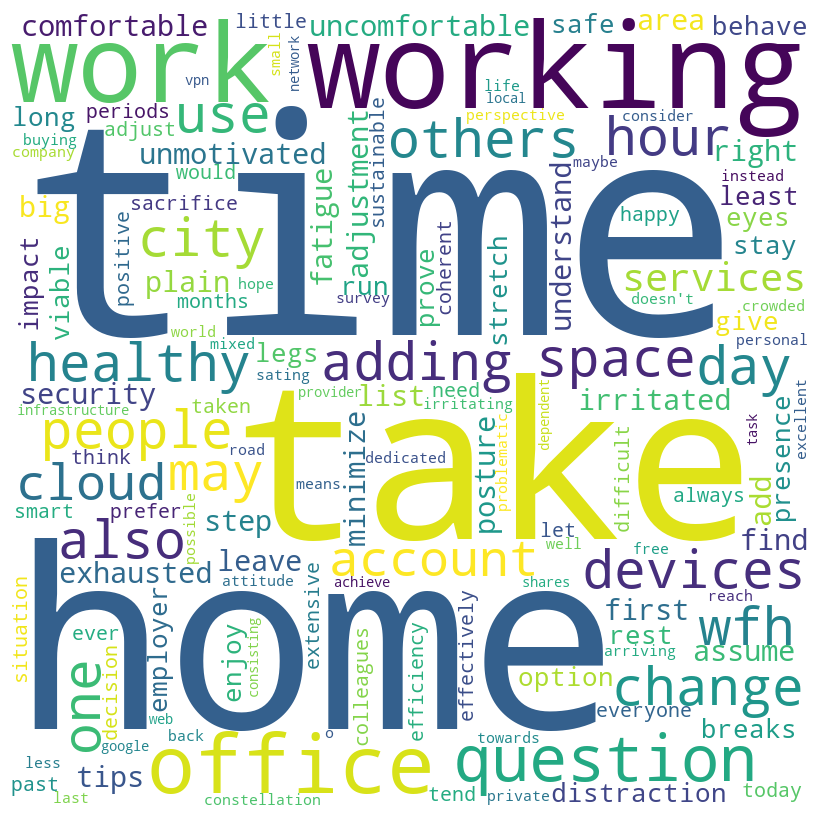

In [53]:
# importing the libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = content_stop_words

# iterate through the csv file
for val in WFH_COVID_crisis_df.Comments:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Most of the repeated words are home, time which means people are enjoying WFH

### **Method effectiveness for EDA**

The analysis is conducted through EDA techniques and machine learning models. As per the visualizations results age 35-44 group people are responded positively compared to other age groups. According to CMIE the younger generations lost their job due to the pandemic regulations which is WFH. The author did very interesting study on employee designation analysis. That means the author perspective is to find which type of employees are enjoying the work structure during pandemic and which are struggling to work.  The results are pretty reasonable i.e. IT professionals are the second highest count people whose response is more positive. The first positive highest count response is others and they are Human Resource team, testers, business analyst and support developers. Employers are providing more corporate assets than personal assets because of security issues. The records are saying that Laptop is the most used device by employees for work. There are some other devices also present like desktop, tap and smart phone. But these devices are not so in popular use than laptop. Along with these devices organizations are also providing mouse, keyboard and WIFI connection.

# Step 5 : Pre processing : Machine learning

Machine learning models are used to predict the future data based on some trained data. By calculating accuracy or error with the help of classification or regression tasks researcher can identity how accurately can predict future data. The main purpose of machine learning in this study is to predict the accuracy of employee satisfaction based on few features such as s'Awareness', 'Preference', 'Designation', 'devices'and 'guidelinesgiven' to find their feature importance.


## Training and Test data

In [54]:
# Assigning to df variable for future analysis
df = WFH_COVID_crisis_df

In [55]:
# Selecting input data
X = df[['Awareness', 'Preference', 'Designation', 'Devices','Useofdevicesbyothers','Guidelinesgiven']]

In [56]:
# Creating dummy variables for input training data
X = pd.get_dummies(X,drop_first= True)

In [57]:
# Defining output variable
y = df['Satisfaction']

In [58]:
# Polynomial feature with degree 3
poly_conv=PolynomialFeatures(degree=3)

In [59]:
# Transform input data
poly_feat=poly_conv.fit_transform(X)

In [60]:
# Calculating zscore for normalising the data
X=stats.zscore(X)
# Printing first 5 rowns using head function
X[0:5]

,Useofdevicesbyothers,Awareness_Instructions available to the corporate portal or website;Instructions provided via email;,Awareness_Instructions provided via email;,Awareness_No,Awareness_Nothing of the above;,Awareness_Online training program;Instructions available to the corporate portal or website;,Awareness_Online training program;User manual documentation (distributed in any way);,Awareness_Online training program;User manual documentation (distributed in any way);Instructions available to the corporate portal or website;Instructions provided via email;,Awareness_User manual documentation (distributed in any way);,Awareness_User manual documentation (distributed in any way);Instructions available to the corporate portal or website;,...,"Guidelinesgiven_dont give your password, and be careful of the browser","Guidelinesgiven_email phising, unattended devices",Guidelinesgiven_keep the system constantly updated; don't share credentials with any third party; ensure proper access control measures for video conferences; call the admin if something happens,Guidelinesgiven_mainly password protection\nreminder to close vpn when using the pc outside working hours\nlock screen when leaving pc open,"Guidelinesgiven_password policy, vpn instructions",Guidelinesgiven_passwords for connection to our system,Guidelinesgiven_use VPN,"Guidelinesgiven_use passwords on company laptop, install antivirus",Guidelinesgiven_vpn access credential mechanisms\nupdated rules regarding the data mgt & remote desktop precautions,"Guidelinesgiven_working hours, mapping resource required, working processes"
0,-0.408248,-0.127,-0.260378,0.459933,-0.19245,-0.089443,-0.063119,-0.063119,-0.063119,-0.063119,...,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119
1,-0.408248,-0.127,-0.260378,0.459933,-0.19245,-0.089443,-0.063119,-0.063119,-0.063119,-0.063119,...,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119
2,-0.408248,-0.127,-0.260378,0.459933,-0.19245,-0.089443,-0.063119,-0.063119,-0.063119,-0.063119,...,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119
3,-0.408248,-0.127,-0.260378,0.459933,-0.19245,-0.089443,-0.063119,-0.063119,-0.063119,-0.063119,...,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119
5,-0.408248,-0.127,-0.260378,0.459933,-0.19245,-0.089443,-0.063119,-0.063119,-0.063119,-0.063119,...,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119,-0.063119


In [61]:
# Splitting the input data for finding the predictions using model selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

The splitting is done like 80% of the data is for train and 20% of data is for test with random state 101.

## Support Vector Machine Learing Algorithm

In [62]:
# Fitting the model with rbf as kernel
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
# Fitting the model with poly as kernel
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [63]:
# Finding the predictions for input test data
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [64]:
# Calculating the accuracy for output test with predicted data for polynomial kernal
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  47.06
F1 (Polynomial Kernel):  32.16


In [65]:
# Calculating the accuracy for output test with predicted data for rbf kernal
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  45.10
F1 (RBF Kernel):  28.03


SVM accuracy is 47.06% with kernal Poly.

## Logistic Regression

In [66]:

# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=585)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
LR_accuracy = mean(n_scores) * 100

LR_accuracy

C:\Users\USER\anaconda3\envs\Neural_env\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\USER\anaconda3\envs\Neural_env\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\USER\anaconda3\envs\Neural_env\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Mean Accuracy: 0.384 (0.093)


38.369230769230775

In [67]:
# fit the model on the whole dataset
model.fit(X, y)

LogisticRegression(multi_class='multinomial')

In [68]:
# Predecting the test data in binary format.
employee_lr_pred = model.predict(X_test)
employee_lr_pred

array(['Agree', 'Strongly agree', 'Agree', 'Strongly agree', 'Agree',
       'Agree', 'Agree', 'Strongly agree', 'Agree', 'Agree',
       'Strongly agree', 'Agree', 'Agree', 'Strongly agree', 'Agree',
       'Agree', 'Agree', 'Agree', 'Agree', 'Agree', 'Agree', 'Undecided',
       'Agree', 'Strongly agree', 'Agree', 'Agree', 'Agree', 'Agree',
       'Strongly agree', 'Agree', 'Agree', 'Agree', 'Strongly agree',
       'Agree', 'Agree', 'Agree', 'Strongly agree', 'Agree', 'Agree',
       'Agree', 'Strongly agree', 'Disagree', 'Agree', 'Agree', 'Agree',
       'Agree', 'Strongly agree', 'Strongly agree', 'Agree',
       'Strongly agree', 'Strongly agree'], dtype=object)

In [69]:

print(metrics.classification_report(y_test, model.predict(X_test)))

                precision    recall  f1-score   support

         Agree       0.60      0.91      0.72        23
      Disagree       1.00      0.33      0.50         3
Strongly agree       0.86      0.57      0.69        21
     Undecided       1.00      0.25      0.40         4

      accuracy                           0.69        51
     macro avg       0.86      0.52      0.58        51
  weighted avg       0.76      0.69      0.67        51



The accuracy for LR is 38.4%.

## Decision Tree

In [70]:
# Fitting Classifier to the Training Set

classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [71]:
# encoding categorical data e.g. employee outcome as a dummy variable
y,class_names = pd.factorize(y)

In [72]:
# predicting the train data
y_pred_train =classifier.predict(X_train)

In [73]:

# Model performance on training set
accuracy = metrics.accuracy_score(y_train, y_pred_train)

print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.47


In [74]:
# Printing the confusion matrix
cm = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)

Confusion Matrix: 
 [[70  0 10  0  0]
 [ 8  0  5  0  0]
 [60  0 19  0  0]
 [ 2  0  3  3  0]
 [13  0  5  0  3]]


In [75]:

# Printing the classfication report
print(metrics.classification_report(y_test, classifier.predict(X_test)))

                precision    recall  f1-score   support

         Agree       0.49      0.91      0.64        23
      Disagree       0.00      0.00      0.00         3
Strongly agree       0.62      0.24      0.34        21
     Undecided       0.00      0.00      0.00         4

      accuracy                           0.51        51
     macro avg       0.28      0.29      0.25        51
  weighted avg       0.48      0.51      0.43        51



C:\Users\USER\anaconda3\envs\Neural_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\envs\Neural_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\envs\Neural_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
# Predicting the test results
y_pred=classifier.predict(X_test)


In [77]:


accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
DT_accuracy = accuracy * 100


Accuracy: 0.51


In [78]:
# Finding the confusion matrix
DT_cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', DT_cm)
#print(classification_report(y_test, y_pred, target_names=class_names))

Confusion Matrix: 
 [[21  0  2  0]
 [ 2  0  1  0]
 [16  0  5  0]
 [ 4  0  0  0]]


# KNN

In [79]:
# setting k value
arr_K = 20
employee_mean_acc = np.zeros((arr_K-1))
for n in range(1,arr_K):
    
    #Train the Model and Predict it
    employee_neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    # predecting the input test data
    employee_pred=employee_neigh.predict(X_test)
    # calculating accuracy score
    employee_mean_acc[n-1] = metrics.accuracy_score(y_test, employee_pred)
  
# printing mean absolute error for KNN
employee_mean_acc

array([0.49019608, 0.41176471, 0.33333333, 0.45098039, 0.41176471,
       0.41176471, 0.41176471, 0.39215686, 0.39215686, 0.43137255,
       0.39215686, 0.39215686, 0.33333333, 0.35294118, 0.39215686,
       0.43137255, 0.41176471, 0.39215686, 0.43137255])

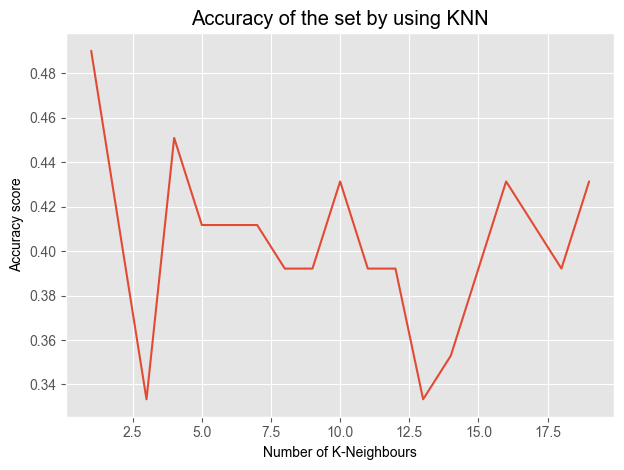

In [80]:
# Ploting the graph accuracy versus k-neighbours
plt.title('Accuracy of the set by using KNN')
plt.xlabel('Number of K-Neighbours')
plt.ylabel('Accuracy score')
plt.tight_layout()
sns.set_theme(style="darkgrid")
plt.plot(range(1,arr_K),employee_mean_acc)
plt.show()

In [81]:
# initializing the k value
k = 1
#Fit the trained data set
employee_neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

In [82]:
# Predecting the output
employee_predict = employee_neigh.predict(X_test)
employee_predict[0:5]

array(['Strongly agree', 'Strongly agree', 'Agree', 'Agree', 'Agree'],
      dtype=object)

In [83]:
# Finding the accuracy score using inbuild function
employee_knn_acc = metrics.accuracy_score(y_test, employee_predict)*100
print("Employee Test data set Accuracy with KNN: ", employee_knn_acc)

Employee Test data set Accuracy with KNN:  49.01960784313725


Text(0.5, 0, 'Test data')

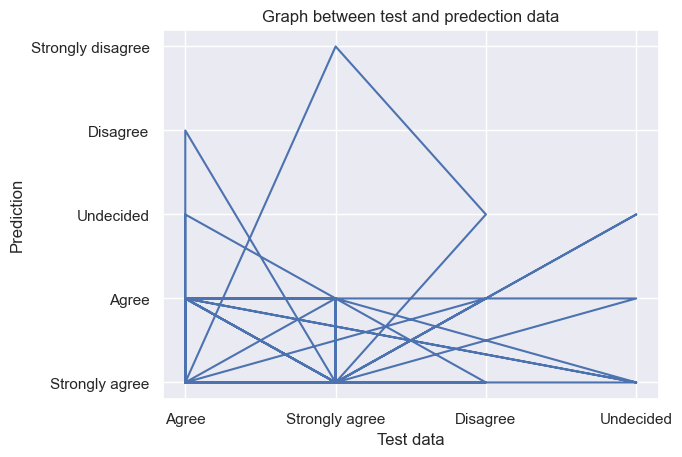

In [84]:
# Plotting the graph between test and predicted data
plt.plot( y_test, employee_predict)
plt.title('Graph between test and predection data')
plt.ylabel('Prediction')
plt.xlabel('Test data')

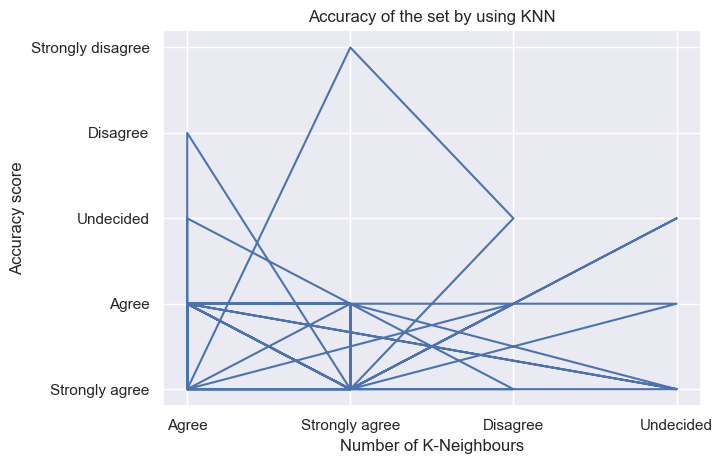

In [85]:
 # Plotting the graph between test data and prediction data
plt.title('Accuracy of the set by using KNN')
plt.xlabel('Number of K-Neighbours')
plt.ylabel('Accuracy score')
plt.tight_layout()
sns.set_theme(style="darkgrid")
plt.plot(y_test,employee_predict)
plt.show()

### Neural Networks

In [86]:
# encode class values as integers
encoder = LabelEncoder()
# Fitting the model
encoder.fit(y)
# Transforming the test data
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [87]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(5, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1616      
                                                                 
 dense_1 (Dense)             (None, 5)                 85        
                                                                 
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


In [88]:

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X,
                    dummy_y,
                    callbacks=[es],
                    epochs=8000000, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/8000000
21/21 [==============================] - 3s 47ms/step - loss: 1.7798 - accuracy: 0.3383 - val_loss: 1.9111 - val_accuracy: 0.2353
Epoch 2/8000000
21/21 [==============================] - 0s 6ms/step - loss: 1.6347 - accuracy: 0.4179 - val_loss: 1.9124 - val_accuracy: 0.2157
Epoch 3/8000000
21/21 [==============================] - 0s 6ms/step - loss: 1.5345 - accuracy: 0.4328 - val_loss: 1.9077 - val_accuracy: 0.1961
Epoch 4/8000000
21/21 [==============================] - 0s 8ms/step - loss: 1.4532 - accuracy: 0.4627 - val_loss: 1.8986 - val_accuracy: 0.1961
Epoch 5/8000000
21/21 [==============================] - 0s 9ms/step - loss: 1.3851 - accuracy: 0.4726 - val_loss: 1.8878 - val_accuracy: 0.1765
Epoch 6/8000000
21/21 [==============================] - 0s 8ms/step - loss: 1.3297 - accuracy: 0.4776 - val_loss: 1.8752 - val_accuracy: 0.1765
Epoch 7/8000000
21/21 [==============================] - 0s 8ms/step - loss: 1.2766 - accuracy: 0.4925 - val_loss: 1.8644 - val_a

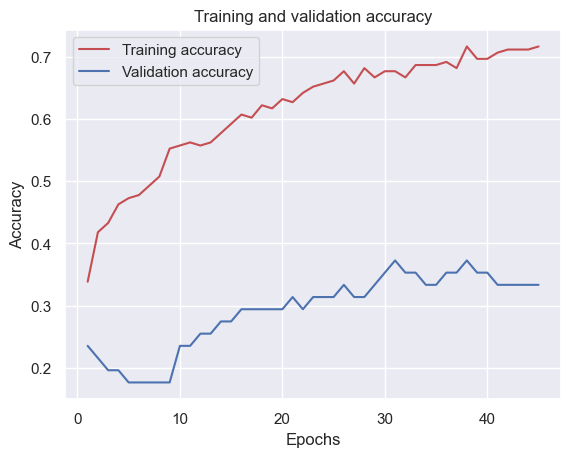

[0.3383084535598755,
 0.41791045665740967,
 0.43283581733703613,
 0.46268656849861145,
 0.4726368188858032,
 0.4776119291782379,
 0.49253731966018677,
 0.5074626803398132,
 0.5522388219833374,
 0.5572139024734497,
 0.5621890425682068,
 0.5572139024734497,
 0.5621890425682068,
 0.5771144032478333,
 0.5920398235321045,
 0.606965184211731,
 0.6019900441169739,
 0.6218905448913574,
 0.6169154047966003,
 0.6318408250808716,
 0.6268656849861145,
 0.641791045665741,
 0.6517412662506104,
 0.6567164063453674,
 0.6616915464401245,
 0.676616907119751,
 0.6567164063453674,
 0.6815920472145081,
 0.6666666865348816,
 0.676616907119751,
 0.676616907119751,
 0.6666666865348816,
 0.6865671873092651,
 0.6865671873092651,
 0.6865671873092651,
 0.6915422677993774,
 0.6815920472145081,
 0.7164179086685181,
 0.6965174078941345,
 0.6965174078941345,
 0.7064676880836487,
 0.711442768573761,
 0.711442768573761,
 0.711442768573761,
 0.7164179086685181]

In [89]:

history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
NN_acc = acc
NN_acc

In [90]:

preds = model.predict(X) # see how the model did!
print(preds[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(preds[0])) # sum it up! Should be 1

8/8 [==============================] - 0s 2ms/step
[0.65603477 0.31001756 0.00488932 0.02388301 0.0051753 ]
0.9999999


In [91]:
# more detail on how well things were predicted
print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       103
           1       0.59      0.74      0.65       100
           2       1.00      0.25      0.40         8
           3       0.86      0.24      0.38        25
           4       0.50      0.50      0.50        16

    accuracy                           0.62       252
   macro avg       0.72      0.48      0.52       252
weighted avg       0.65      0.62      0.61       252



## Finding the best model 

In [92]:
#Creating a Two-dimensional array which contains above 5 machine learning models
best_acc = [['Logistic Regression', LR_accuracy], ['Decision Tree', DT_accuracy], ['KNN', employee_knn_acc], ['SVM', poly_accuracy*100]]

In [93]:
best_model = pd.DataFrame(best_acc, columns = ["Model", "Accuracy"])
best_model

,Model,Accuracy
0,Logistic Regression,38.369231
1,Decision Tree,50.980392
2,KNN,49.019608
3,SVM,47.058824


From the above results Decison tree is giving the highest accuracy with 51 compared to other algorithms and least provided accuract is by Logistic regression classifier.

<b>As Neural network has the highest accuracy i.e. 71% compared to Decision Tree accuracy which is 51%. We are concluding Neural networks are the best model for this analysis.</B>

## Confusion matrix for the best model

<b>Confusion matrix for Neural network

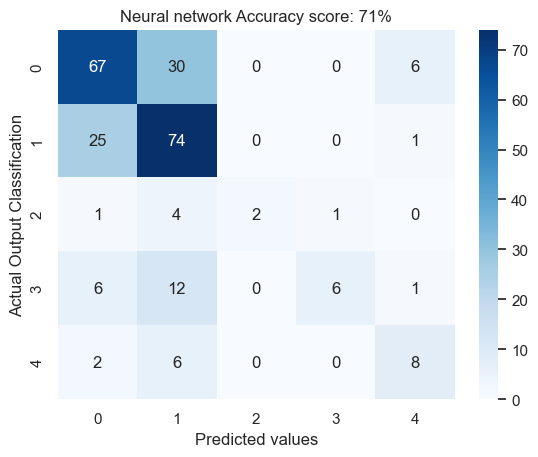

In [97]:
matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
matrix

#Confusion matrix
NN_con_matrix = plt.axes()
sns.heatmap(matrix,annot=True, cmap="Blues")
#Setting title
NN_con_matrix.set_title('Neural network Accuracy score: 71%')
#Setting x label
NN_con_matrix.set_xlabel("Predicted values")
#Setting ylabel
NN_con_matrix.set_ylabel("Actual Output Classification")
plt.show()

<b>Confusion matrix for Decision tree which is the highest accuracy in Machine learning models.

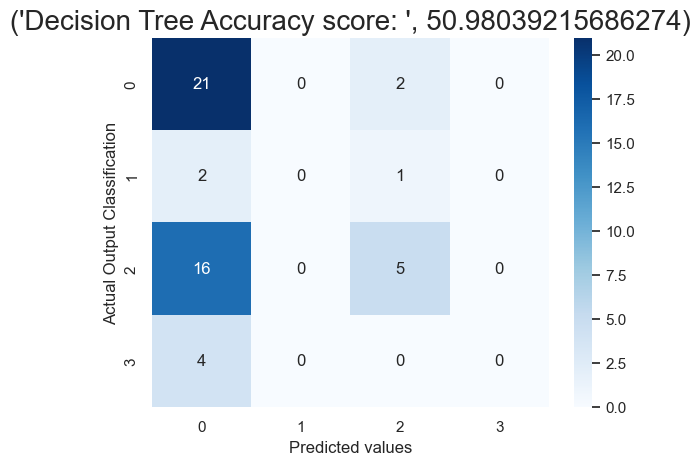

In [95]:
#Confusion matrix
DT_con_matrix = plt.axes()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True, cmap="Blues")
#Setting title
DT_con_matrix.set_title(('Decision Tree Accuracy score: ', DT_accuracy), fontsize=20)
#Setting x label
DT_con_matrix.set_xlabel("Predicted values")
#Setting ylabel
DT_con_matrix.set_ylabel("Actual Output Classification")
plt.show()

<b> Feature Importance

Feature: 0, Score: 0.03898
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.03327
Feature: 3, Score: 0.04229
Feature: 4, Score: 0.02189
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01262
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00296
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.03960
Feature: 13, Score: 0.01374
Feature: 14, Score: 0.01952
Feature: 15, Score: 0.07981
Feature: 16, Score: 0.05923
Feature: 17, Score: 0.06773
Feature: 18, Score: 0.04872
Feature: 19, Score: 0.03240
Feature: 20, Score: 0.00526
Feature: 21, Score: 0.00873
Feature: 22, Score: 0.02857
Feature: 23, Score: 0.01232
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.01798
Feature: 26, Score: 0.02330
Feature: 27, Score: 0.01318
Feature: 28, Score: 0.01751
Feature: 29, Score: 0.00526
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00937
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.01309
Feature: 35, Score: 0.00853
Fe

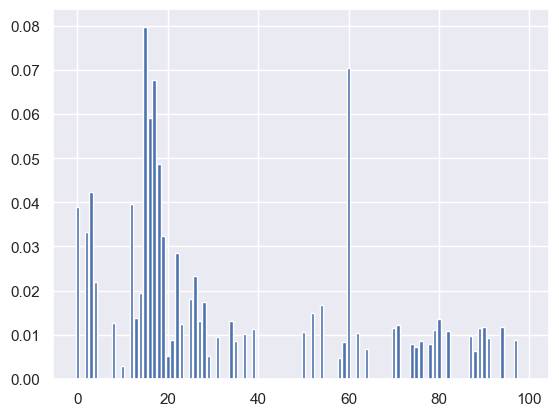

In [96]:

# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Conclusion

The purpose of doing this analysis is to find the impact of COVID on IT employees and what are most important factors that effects employee satisfaction. The analysis is conducted through EDA techniques and machine learning models. As per the visualizations results age 35-44 group people are responded positively compared to other age groups. According to CMIE the younger generations lost their job due to the pandemic regulations which is WFH. The author did very interesting study on employee designation analysis. That means the author perspective is to find which type of employees are enjoying the work structure during pandemic and which are struggling to work.  The results are pretty reasonable i.e. IT professionals are the second highest count people whose response is more positive. The first positive highest count response is others and they are Human Resource team, testers, business analyst and support developers. Employers are providing more corporate assets than personal assets because of security issues. The records are saying that Laptop is the most used device by employees for work. There are some other devices also present like desktop, tap and smart phone. But these devices are not so in popular use than laptop. Along with these devices organizations are also providing mouse, keyboard and WIFI connection.

Machine learning algorithms are performed to find the feature importance as EDA always not gives correct predictions in future. Out of five algorithms it is proven that the Support vector Machine model is the best algorithm by comparing accuracy with other algorithms. The performed machine learning models are support vector machine, decision tree, KNN and logistic regression. Along with these the author applied advanced neural network also for better predictions. The accuracy for the decision tree model is 51% which is good accuracy with this accuracy we can say in future the predictions can be done perfectly (Gold and Sollich, 2003). Comparing various multi categorization techniques, neural networks have the highest accuracy (71.6%), which is impressive. With the aid of a confusion matrix, the author measured the AUC-ROC curve, recall, precision, and accuracy of the four machine learning techniques.


# References



CDC (2019). Fast Facts. [online] Centers for Disease Control and Prevention. Available at: https://www.cdc.gov/tobacco/data_statistics/fact_sheets/fast_facts/index.htm.

DataFlair. (2017). Artificial Neural Networks for Machine Learning - Every aspect you need to know about. [online] Available at: https://data-flair.training/blogs/artificial-neural-networks-for-machine-learning/.

Gold, C. and Sollich, P. (2003). Model selection for support vector machine classification. Neurocomputing, 55(1-2), pp.221–249. doi:10.1016/s0925-2312(03)00375-8.
 
Lam, H.K., Ekong, U., Liu, H., Xiao, B., Araujo, H., Ling, S.H. and Chan, K.Y. (2014). A study of neural-network-based classifiers for material classification. Neurocomputing, [online] 144, pp.367–377. Available at: https://www.sciencedirect.com/science/article/abs/pii/S0925231214006274 [Accessed 21 Mar. 2023].

Russo, D., Hanel, P.H.P., Altnickel, S. and van Berkel, N. (2021). The Daily Life of Software Engineers During the COVID-19 Pandemic. 2021 IEEE/ACM 43rd International Conference on Software Engineering: Software Engineering in Practice (ICSE-SEIP). doi:10.1109/icse-seip52600.2021.00048.

Sharma, Y.S. (2020), “27 Million youth in age group of 20-30 years lost jobs in April: CMIE”, available at: https://economictimes.indiatimes.com/news/economy/indicators/unemployment-rate-dips-to-23-97-data-from-cmie-shows/articleshow/75689370.cms?from=mdr (accessed 23 July 2020).

www.proquest.com. (n.d.). The Relationship Between Remote Work and Job Satisfaction: The Mediating Roles of Perceived Autonomy, Work-family Conflict, and Telecommuting Intensity - ProQuest. [online] Available at: https://www.proquest.com/openview/2d31cf88ac3d494d612b66c7fa12e0e2/1?pq-origsite=gscholar&cbl=18750&diss=y.
